In [1]:
import networkx as nx
from QAOA_locality import *


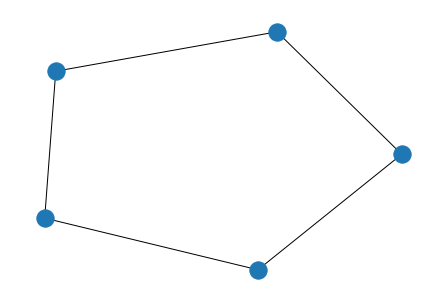

In [36]:

# Step 1: Create a graph for the maxCUT problem
G = nx.Graph()
G.add_nodes_from(range(5))  # adds nodes to the Graph
# adds connections
G.add_edge(0, 1)
G.add_edge(1, 3)
G.add_edge(0, 2)
G.add_edge(2, 4)
G.add_edge(3, 4)

# Visualize the graph (optional)
nx.draw(G)


In [3]:

# Step 2: Create the Hamiltonian for the graph
H = make_H_maxCUT(G)


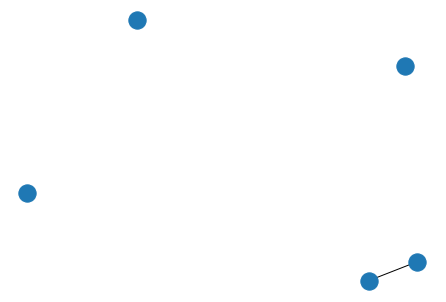

In [4]:
# Step 3: Create a subgraph for a smaller problem, i.e. term of the Hamilotian.
G1 = nx.Graph()
G1.add_nodes_from(range(5)) # Note that numeration should be the same
G1.add_edge(0, 1)

# Visualize the subgraph (optional)
nx.draw(G1)


In [5]:
# Step 4: Create the Hamiltonian for the subgraph
H1 = make_H_maxCUT(G1)


In [6]:
# Step 5: Construct the QAOA operator for two layers
# Note: You can adjust the number of layers as needed
qaoa = construct_QAOA_operator_term(H1, H, number_of_layers=2)


In [7]:
# Step 6: Count the X/I solutions and other statistics
x_i_solutions, max_locality, avg_locality, num_solutions = count_solutions_XI(qaoa)


print("\nX/I Solutions:", x_i_solutions)
print("Number of X/I Solutions:", num_solutions)
# print("Maximum Locality:", max_locality)
# print("Average Locality:", avg_locality)



X/I Solutions: [('[1, 0, 0, 0, 0]', -0.109649), ('[0, 1, 0, 0, 0]', -0.109649), ('[0, 0, 1, 0, 0]', 1e-05), ('[0, 0, 0, 1, 0]', 1e-05), ('[1, 1, 1, 1, 0]', 1e-06)]
Number of X/I Solutions: 5


If you want to see the QAOA for the whole Hamiltonian, i.e. exp_H @ exp_X @ H @ exp_X.T.conjugate() @ exp_H.T.conjugate() you can use one of the following approaches

In [35]:
number_of_layers = 2
# let's fix angles here to test that ouputs are the same
beta_angle = np.random.rand(number_of_layers) * np.pi / 3
gamma_angle = np.random.rand(number_of_layers) * np.pi / 6

In [33]:
count_solutions_XI(construct_QAOA_operator_term(H, H, number_of_layers, beta_angle, gamma_angle) )

([('[1, 0, 0, 0, 0]', 0.316104),
  ('[0, 1, 0, 0, 0]', 0.316104),
  ('[0, 0, 1, 0, 0]', 0.316104),
  ('[0, 0, 0, 1, 0]', 0.316104),
  ('[0, 0, 0, 0, 1]', 0.316104),
  ('[1, 1, 1, 1, 0]', 0.041042),
  ('[1, 1, 1, 0, 1]', 0.041042),
  ('[1, 1, 0, 1, 1]', 0.041042),
  ('[1, 0, 1, 1, 1]', 0.041042),
  ('[0, 1, 1, 1, 1]', 0.041042)],
 4,
 2.5,
 10)

In [34]:
count_solutions_XI(construct_QAOA_operator_from_H(H,number_of_layers, beta_angle, gamma_angle))

([('[1, 0, 0, 0, 0]', 0.316104),
  ('[0, 1, 0, 0, 0]', 0.316104),
  ('[0, 0, 1, 0, 0]', 0.316104),
  ('[0, 0, 0, 1, 0]', 0.316104),
  ('[0, 0, 0, 0, 1]', 0.316104),
  ('[1, 1, 1, 1, 0]', 0.041042),
  ('[1, 1, 1, 0, 1]', 0.041042),
  ('[1, 1, 0, 1, 1]', 0.041042),
  ('[1, 0, 1, 1, 1]', 0.041042),
  ('[0, 1, 1, 1, 1]', 0.041042)],
 4,
 2.5,
 10)